<a href="https://colab.research.google.com/github/aaolcay/Autoencoders/blob/main/autoencoder_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Author**
*The code was written by Abdullah Olcay (University of Southampton). If you want to copy or share the code, please refer to me!*

*The autoencoder architecture was constituted as similar to Valerio Velardo's work (you can access his YouTube channel `@ValerioVelardoTheSoundofAI`). This is because of a need for detailed comparison of our model's output. The author highly recommends you to follow his lectures if you are interested in artificial intelligence on audio/sound.*



*For more information contact me:* 
*olcayazzam@gmail.com*

---



## **Load Data**
The data used in the autoencoder implementation is taken from `tensorflow`. That is `mnist` including images of numbers.

In [16]:
# Load Data
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_train = x_train[..., np.newaxis]
print(x_train.shape)

(60000, 28, 28, 1)


## **Autoencoders**
This python script contains an implementation of a basic autoencoders with convolutional layers `(conv2D)`. Autoencoders include three main stages:
1. **Encoder**: 4 layers with conv2D + ReLU + BatchNormalization
2. **Bottleneck**: Flatten + Dense
3. **Decoder**: 4 layers with conv2D + ReLU + BatchNormalization

Note: In this application, **Keras functional API** is used. 
Definition: The Keras functional API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

In [17]:
import tensorflow.keras as keras
import numpy as np
from keras import backend

In [18]:
# Assign input shape as a tuple 
# input_shape = (x_train.shape[1],x_train.shape[2])
input_shape = (x_train.shape[1],x_train.shape[2],1)

### **Encoder**

In [19]:
# 1. Encoder
encoder_input_layer = keras.layers.Input(shape=input_shape, name='encoder_input')
conv_layer_1 = keras.layers.Conv2D(filters=32, 
                                   kernel_size=(3,3),
                                   strides= (1,1),
                                   padding='same',
                                   name='encoder_conv_layer_1')
conv_layer_1 = conv_layer_1(encoder_input_layer)
conv_layer_1 = keras.layers.ReLU(name='encoder_relu_1')(conv_layer_1)
conv_layer_1 = keras.layers.BatchNormalization(name='encoder_bn_1')(conv_layer_1)

conv_layer_2 = keras.layers.Conv2D(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (2,2),
                                   padding='same',
                                   name='encoder_conv_layer_2') 
conv_layer_2 = conv_layer_2(conv_layer_1)
conv_layer_2 = keras.layers.ReLU(name='encoder_relu_2')(conv_layer_2)
conv_layer_2 = keras.layers.BatchNormalization(name='encoder_bn_2')(conv_layer_2)

conv_layer_3 = keras.layers.Conv2D(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (2,2),
                                   padding='same',
                                   name='encoder_conv_layer_3') 
conv_layer_3 = conv_layer_3(conv_layer_2)
conv_layer_3 = keras.layers.ReLU(name='encoder_relu_3')(conv_layer_3)
conv_layer_3 = keras.layers.BatchNormalization(name='encoder_bn_3')(conv_layer_3)

conv_layer_4 = keras.layers.Conv2D(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (1,1),
                                   padding='same',
                                   name='encoder_conv_layer_4') 
conv_layer_4 = conv_layer_4(conv_layer_3)
conv_layer_4 = keras.layers.ReLU(name='encoder_relu_4')(conv_layer_4)
conv_layer_4 = keras.layers.BatchNormalization(name='encoder_bn_4')(conv_layer_4)
model_encoder = conv_layer_4

### **Bottleneck**

In [20]:
# 2. Bottleneck
latent_space_dim = 2
bottleneck = keras.layers.Flatten()(model_encoder)
bottleneck = keras.layers.Dense(latent_space_dim, name='encoder_output')(bottleneck)

In [21]:
# Make this network a model
encoder = keras.Model(encoder_input_layer,bottleneck, name='encoder')
#encoder.summary()

### **Decoder**

In [22]:
# 3. Decoder

# The input, which is latent space (bottleneck), of decoder
decoder_input_layer = keras.layers.Input(shape=latent_space_dim, name='decoder_input')

# Build a dense layer as we need to mirror our encoder, this dense will hold all the output
# of encoder in 1D vector
shape_last_en = conv_layer_4.shape[1:] # take the shape of the latest layer in encoder: [7, 7, 64]
num_neurons = np.prod(shape_last_en) # 7 x 7 x 64 = 3136
decoder_dense_layer = keras.layers.Dense(num_neurons, name= 'decoder_dense_layer')(decoder_input_layer)

# Thus, dense layer flatten our output from the encoder, we need to reshape it
decoder_reshape_layer = keras.layers.Reshape(shape_last_en)(decoder_dense_layer)

# Decoder Convolutional Layers (Mirror of Encoder)
# Therefore, we also use convolutional transpose
dec_conv_layer_1 = keras.layers.Conv2DTranspose(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (1,1),
                                   padding='same',
                                   name='decoder_conv_layer_1')
dec_conv_layer_1 = dec_conv_layer_1(decoder_reshape_layer)
dec_conv_layer_1 = keras.layers.ReLU(name='decoder_relu_1')(dec_conv_layer_1)
dec_conv_layer_1 = keras.layers.BatchNormalization(name='decoder_bn_1')(dec_conv_layer_1)

dec_conv_layer_2 = keras.layers.Conv2DTranspose(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (2,2),
                                   padding='same',
                                   name='decoder_conv_layer_2') 
dec_conv_layer_2 = dec_conv_layer_2(dec_conv_layer_1)
dec_conv_layer_2 = keras.layers.ReLU(name='decoder_relu_2')(dec_conv_layer_2)
dec_conv_layer_2 = keras.layers.BatchNormalization(name='decoder_bn_2')(dec_conv_layer_2)

dec_conv_layer_3 = keras.layers.Conv2DTranspose(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (2,2),
                                   padding='same',
                                   name='decoder_conv_layer_3') 
dec_conv_layer_3 = dec_conv_layer_3(dec_conv_layer_2)
dec_conv_layer_3 = keras.layers.ReLU(name='decoder_relu_3')(dec_conv_layer_3)
dec_conv_layer_3 = keras.layers.BatchNormalization(name='decoder_bn_3')(dec_conv_layer_3)

# Output layer of decoder (we had 4 convolutional layers in encoder, and so 
# the latest layer of decoder corresponds to the the fourth layer in encoder)
dec_conv_layer_4 = keras.layers.Conv2DTranspose(filters=1, # as images have 1 channel  
                                   kernel_size=(3,3),
                                   strides= (1,1),
                                   padding='same',
                                   name='decoder_conv_layer_4')
dec_conv_layer_4 = dec_conv_layer_4(dec_conv_layer_3)
decoder_output_layer = keras.layers.Activation('sigmoid', name="sigmoid_layer")(dec_conv_layer_4)

In [23]:
# Make this network a model
decoder = keras.Model(decoder_input_layer,decoder_output_layer, name='decoder')

### **Autoencoder (Combining encoder and decoder parts)**
To build autoencoder, we need to combine both encoder and decoder parts.

In [24]:
# Autoencoder
# autoencoder's input is the same as the input of encoder
autoencoder_input = encoder_input_layer
# autoencoder's output is the output of decoder that takes encoder with encoder input
autoencoder_output = decoder(encoder(encoder_input_layer))
autoencoder = keras.Model(autoencoder_input, autoencoder_output, name='autoencoder')

In [25]:
encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder_conv_layer_1 (Conv2  (None, 28, 28, 32)       320       
 D)                                                              
                                                                 
 encoder_relu_1 (ReLU)       (None, 28, 28, 32)        0         
                                                                 
 encoder_bn_1 (BatchNormaliz  (None, 28, 28, 32)       128       
 ation)                                                          
                                                                 
 encoder_conv_layer_2 (Conv2  (None, 14, 14, 64)       18496     
 D)                                                              
                                                           

#### **Compile Autoencoder Model**
We chose `Adam` optimizer and `MeanSquaredError` as loss function

In [26]:
# Compile network (Adam optimizer with learning rate 0.0005)
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
mse_loss = keras.losses.MeanSquaredError()
autoencoder.compile(optimizer=optimizer, loss=mse_loss, metrics=['accuracy'])

#### **Train Autoencoder Model**
The data chose in directly taken from **Kaggle** `mnist` file that includes bunch of images.
The batch size was chosen, to mitigate possibility of overfitting, as 

In [27]:
# Train network
# We did not use shuffle=True in training as mnist data consists of labels randomly (i.e., it is not like labels = [0,1,2,3...], it is something like label = [1, 3, 2, 4, 1, 0, 7, ...])
history = autoencoder.fit(x_train[:500], 
                  x_train[:500], # we expect to get the output as same as input
                  batch_size=32,
                  epochs=50)

Epoch 1/50
16/16 [==============================] - 4s 117ms/step - loss: 0.1943 - accuracy: 0.6221
Epoch 2/50
16/16 [==============================] - 2s 115ms/step - loss: 0.1165 - accuracy: 0.7496
Epoch 3/50
16/16 [==============================] - 3s 164ms/step - loss: 0.0940 - accuracy: 0.7700
Epoch 4/50
16/16 [==============================] - 2s 116ms/step - loss: 0.0849 - accuracy: 0.7770
Epoch 5/50
16/16 [==============================] - 2s 111ms/step - loss: 0.0794 - accuracy: 0.7804
Epoch 6/50
16/16 [==============================] - 2s 112ms/step - loss: 0.0770 - accuracy: 0.7838
Epoch 7/50
16/16 [==============================] - 2s 115ms/step - loss: 0.0732 - accuracy: 0.7853
Epoch 8/50
16/16 [==============================] - 2s 117ms/step - loss: 0.0702 - accuracy: 0.7877
Epoch 9/50
16/16 [==============================] - 3s 165ms/step - loss: 0.0680 - accuracy: 0.7880
Epoch 10/50
16/16 [==============================] - 2s 119ms/step - loss: 0.0667 - accuracy: 0.7904

In [28]:
# Summarize our network
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 2)                 99842     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         121537    
                                                                 
Total params: 221,379
Trainable params: 220,547
Non-trainable params: 832
_________________________________________________________________


Text(0, 0.5, 'Accuracy in Train Set')

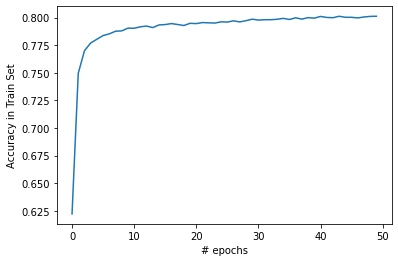

In [29]:
# Look at the history
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('Accuracy in Train Set')


Epoch 1/50
313/313 [==============================] - 39s 126ms/step - loss: 0.0544 - accuracy: 0.7909
Epoch 2/50
313/313 [==============================] - 38s 121ms/step - loss: 0.0496 - accuracy: 0.7935
Epoch 3/50
313/313 [==============================] - 38s 123ms/step - loss: 0.0470 - accuracy: 0.7951
Epoch 4/50
313/313 [==============================] - 39s 126ms/step - loss: 0.0454 - accuracy: 0.7959
Epoch 5/50
313/313 [==============================] - 39s 126ms/step - loss: 0.0445 - accuracy: 0.7965
Epoch 6/50
313/313 [==============================] - 39s 123ms/step - loss: 0.0436 - accuracy: 0.7968
Epoch 7/50
313/313 [==============================] - 41s 131ms/step - loss: 0.0431 - accuracy: 0.7972
Epoch 8/50
313/313 [==============================] - 41s 132ms/step - loss: 0.0425 - accuracy: 0.7974
Epoch 9/50
313/313 [==============================] - 39s 124ms/step - loss: 0.0422 - accuracy: 0.7975
Epoch 10/50
313/313 [==============================] - 39s 123ms/step - l

Text(0, 0.5, 'Accuracy in Train Set')

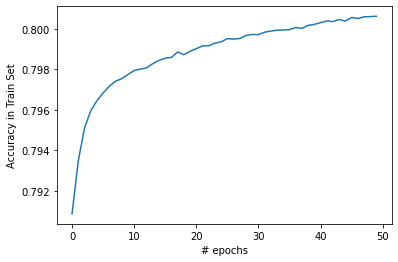

In [30]:
# Increase number of data to train so that we can increase the accuracy value and avoid fluctuating accuracy profile in the graph (if it is)
history = autoencoder.fit(x_train[:10000], 
                  x_train[:10000], # we expect to get the output as same as input
                  batch_size=32,
                  epochs=50)
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('Accuracy in Train Set')

### **Save Model Built**
In order to use a model again in anyway (e.g., in transfer learning for a similar same task), one needs to load a previously built and trained model. Therefore, this model is needed to be saved and prepared for loading in further tasks. The code cell below shows how to save autoencoder model we built along this notebook for generating new images from `mnist` dataset.

In [31]:
# model.save('filename.h5')
autoencoder.save('olcays_model.h5')

### **Load Model Built**
Loading this saved model is easy as long as you know the saving directory of the model.

In [32]:
from tensorflow.keras.models import load_model
new_model = load_model('olcays_model.h5')

Let's check this new_model out whether or not it is the same as that built.

In [33]:
new_model.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 2)                 99842     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         121537    
                                                                 
Total params: 221,379
Trainable params: 220,547
Non-trainable params: 832
_________________________________________________________________


In [62]:
a = new_model.get_weights() # list of weights in new_model after backpropagation (i.e., after training)
b = autoencoder.get_weights() # list of weights in autoencoder
for i in range(len(a)):
  c = a[i]
  d = b[i] 
  if c.all() != d.all():
    print('These two models weights are not equal')
  else:
    print(f'Item {i+1}/{len(a)}: All the weights of these two models are equal')

Item 1/48: All the weights of these two models are equal
Item 2/48: All the weights of these two models are equal
Item 3/48: All the weights of these two models are equal
Item 4/48: All the weights of these two models are equal
Item 5/48: All the weights of these two models are equal
Item 6/48: All the weights of these two models are equal
Item 7/48: All the weights of these two models are equal
Item 8/48: All the weights of these two models are equal
Item 9/48: All the weights of these two models are equal
Item 10/48: All the weights of these two models are equal
Item 11/48: All the weights of these two models are equal
Item 12/48: All the weights of these two models are equal
Item 13/48: All the weights of these two models are equal
Item 14/48: All the weights of these two models are equal
Item 15/48: All the weights of these two models are equal
Item 16/48: All the weights of these two models are equal
Item 17/48: All the weights of these two models are equal
Item 18/48: All the wei

In [68]:
# See optimizer of saved model (we expect to see Adam optimizer as we used)
print(new_model.optimizer)

### **Discussion**
Let's see the output of model by using `model.predict()`. Thus, we can see the new data acquired from autoencoder model built for the generative task. 
You may be interested in how to denoise these images distorted by our autoencoder model.
Answer: Use a new autoencoder for denoising task.

27/27 [==============================] - 4s 138ms/step


Text(0.5, 1.0, 'Autoencoder Applied Data')

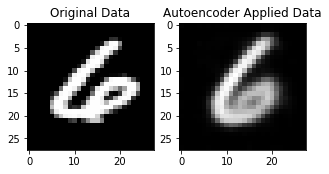

In [116]:
import matplotlib.pyplot as plot
# Randomly choose some data
a = np.random.randint(low=0, high=1000)
b = np.random.randint(low=0, high=1000)
if a>=b:
  start = b
  end = a
else:
  start = a
  end = b

x = x_train[start:end,:,:] # (#samples, #rows, #columns, #channels)
predictions = autoencoder.predict(x)
original = x_train[start:end,:,:]
sample =np.random.randint(low=0, high=original.shape[0])
pred_one = predictions[sample,:,:,:]
original_one = original[sample,:,:,:]
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.imshow(original_one, cmap='gray')
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.imshow(pred_one, cmap='gray')
plt.title('Autoencoder Applied Data')

Thank you for reading, and please ask me if you got any questions.

---

